<a href="https://colab.research.google.com/github/jugleee/learn2py/blob/main/data_preprocessing_practice.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [86]:
fish_length = [25.4, 26.3, 26.5, 29.0, 29.0, 29.7, 29.7, 30.0, 30.0, 30.7, 31.0, 31.0, 
                31.5, 32.0, 32.0, 32.0, 33.0, 33.0, 33.5, 33.5, 34.0, 34.0, 34.5, 35.0, 
                35.0, 35.0, 35.0, 36.0, 36.0, 37.0, 38.5, 38.5, 39.5, 41.0, 41.0, 9.8, 
                10.5, 10.6, 11.0, 11.2, 11.3, 11.8, 11.8, 12.0, 12.2, 12.4, 13.0, 14.3, 15.0]

In [87]:
fish_weight = [242.0, 290.0, 340.0, 363.0, 430.0, 450.0, 500.0, 390.0, 450.0, 500.0, 475.0, 500.0, 
                500.0, 340.0, 600.0, 600.0, 700.0, 700.0, 610.0, 650.0, 575.0, 685.0, 620.0, 680.0, 
                700.0, 725.0, 720.0, 714.0, 850.0, 1000.0, 920.0, 955.0, 925.0, 975.0, 950.0, 6.7, 
                7.5, 7.0, 9.7, 9.8, 8.7, 10.0, 9.9, 9.8, 12.2, 13.4, 12.2, 19.7, 19.9]

In [88]:
import numpy as np

np.column_stack(([1, 2, 3], [4, 5, 6])) # np.column_stack practice

array([[1, 4],
       [2, 5],
       [3, 6]])

In [89]:
fish_data = np.column_stack((fish_length, fish_weight))
print(fish_data[:8])

[[ 25.4 242. ]
 [ 26.3 290. ]
 [ 26.5 340. ]
 [ 29.  363. ]
 [ 29.  430. ]
 [ 29.7 450. ]
 [ 29.7 500. ]
 [ 30.  390. ]]


In [90]:
fish_target = np.concatenate((np.ones(35), np.zeros(14))) # np.concatenate practice for making target data
print(fish_target)

[1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0.]


In [91]:
from sklearn.model_selection import train_test_split

In [92]:
train_input, test_input, train_target, test_target = train_test_split(fish_data, fish_target)

In [93]:
print(train_input.shape, test_input.shape)

(36, 2) (13, 2)


In [94]:
print(train_target.shape, test_target.shape)

(36,) (13,)


In [95]:
print(test_target) # sampling bias is appeared

[0. 0. 1. 1. 1. 1. 1. 0. 1. 1. 1. 1. 0.]


In [96]:
train_input, test_input, train_target, test_target = train_test_split(fish_data, fish_target, stratify = fish_target) # stratify in train_test_split() can split data according to the proportion

In [97]:
print(test_target)

[0. 1. 0. 1. 1. 1. 1. 1. 1. 1. 0. 0. 1.]


In [98]:
from sklearn.neighbors import KNeighborsClassifier
kn = KNeighborsClassifier()
kn.fit(train_input, train_target)
kn.score(test_input, test_target)

1.0

In [99]:
print(kn.predict([[25, 150]])) # error appeared (25 length and 150 weight are bream)

[0.]


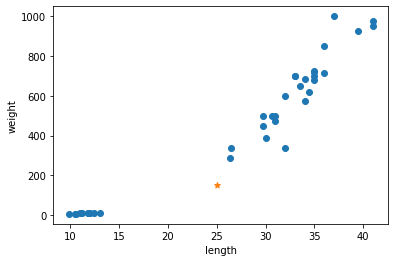

In [100]:
import matplotlib.pyplot as plt

plt.scatter(train_input[:, 0], train_input[:, 1])
plt.scatter(25, 150, marker= '*') # How to look at the matplotlib markers ? here => https://matplotlib.org/stable/api/markers_api.html
plt.xlabel("length")
plt.ylabel("weight")
plt.show()

In [101]:
distances, indexes = kn.kneighbors([[25, 150]]) # default = 5 of neighbors

Text(0, 0.5, 'weight')

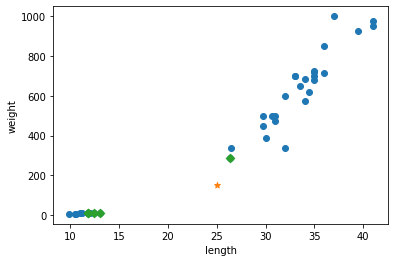

In [102]:
plt.scatter(train_input[:,0], train_input[:,1])
plt.scatter(25, 150, marker='*')
plt.scatter(train_input[indexes, 0], train_input[indexes, 1], marker='D') # Show for KNeighborsClass marking 'D'
plt.xlabel('length')
plt.ylabel('weight')

In [103]:
print(train_input[indexes])

[[[ 12.4  13.4]
  [ 13.   12.2]
  [ 26.3 290. ]
  [ 11.8  10. ]
  [ 11.8   9.9]]]


In [104]:
print(train_target[indexes])

[[0. 0. 1. 0. 0.]]


In [105]:
print([distances])

[array([[137.17988191, 138.32150953, 140.00603558, 140.62090883,
        140.72046759]])]


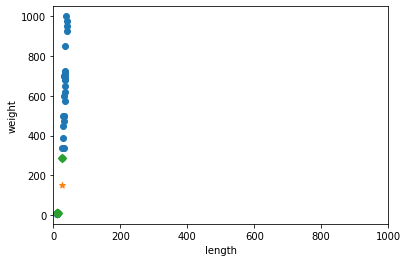

In [106]:
plt.scatter(train_input[:,0],train_input[:,1])
plt.scatter(25, 150, marker='*')
plt.scatter(train_input[indexes,0],train_input[indexes,1], marker='D')
plt.xlim(0,1000)
plt.xlabel('length')
plt.ylabel('weight')
plt.show()

In [107]:
mean = np.mean(train_input, axis=0)
std = np.std(train_input, axis=0)

In [108]:
print(mean, std)

[ 27.375 462.5  ] [ 10.39314344 326.1766614 ]


In [109]:
train_scaled = (train_input - mean) / std

<function matplotlib.pyplot.show>

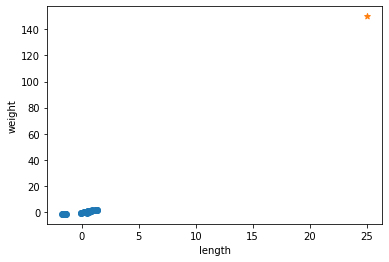

In [111]:
plt.scatter(train_scaled[:,0],train_scaled[:,1])
plt.scatter(25, 150, marker='*')
plt.xlabel('length')
plt.ylabel('weight')
plt.show

<function matplotlib.pyplot.show>

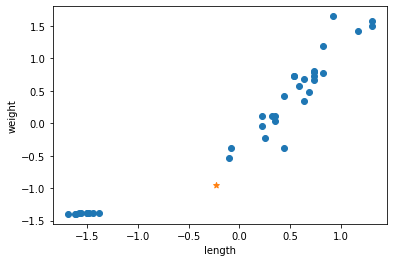

In [115]:
point = ([25, 150] - mean) / std
plt.scatter(train_scaled[:,0], train_scaled[:,1])
plt.scatter(point[0], point[1], marker='*')
plt.xlabel('length')
plt.ylabel('weight')
plt.show

In [116]:
kn.fit(train_scaled, train_target)

KNeighborsClassifier()

In [117]:
test_scaled = (test_input - mean) / std

In [120]:
kn.score(test_scaled, test_target)

1.0

In [123]:
print(kn.predict([point]))

[1.]


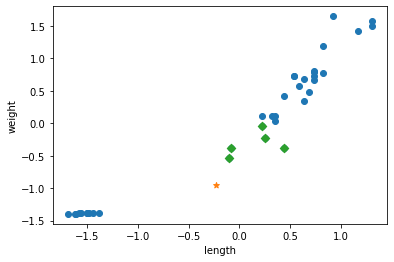

In [124]:
distanse, indexes = kn.kneighbors([point])
plt.scatter(train_scaled[:,0], train_scaled[:,1])
plt.scatter(point[0], point[1], marker='*')
plt.scatter(train_scaled[indexes,0], train_scaled[indexes,1], marker='D')
plt.xlabel('length')
plt.ylabel('weight')
plt.show()